In [2]:
from frust.transformers import transformer_int3
from frust.utils.mols import get_molecule_name
from tooltoad.vis import MolTo3DGrid
import pandas as pd

In [3]:
df = pd.read_csv("../datasets/font_smiles.csv", index_col=0)
#df["names"] = df["smiles"].apply(get_molecule_name)

In [4]:
df

smiles
0                         CN1C=CC=C1
1            N1(CC2=CC=CC=C2)C=CC=C1
2   CC([Si](N1C=CC=C1)(C(C)C)C(C)C)C
3               C[Si](N1C=CC=C1)(C)C
4               CN1C2=C(C=CC=C2)C=C1
5                    C12=CSC=C1OCCO2
6                          C1=CC=CO1
7                         CC1=CC=CO1
8                  CC(C1=CC=CO1)(C)C
9                        COC1=CC=CO1
10             C[Si](C)(OC1=CC=CO1)C

In [5]:
from rdkit import Chem
mol = Chem.MolFromSmiles(df["smiles"].iloc[4])
MolTo3DGrid(mol)

[18:51:40] Molecule does not have explicit Hs. Consider calling AddHs()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [6]:
smiles = list(df["smiles"])

In [7]:
transformed_mol_dict = transformer_int3(smiles[4])

In [16]:
all_mols = []
for smi in smiles:
    transformed_mol_dict = transformer_int3(smi)
    mols = []
    for i in transformed_mol_dict.values():
        mols.append(i[0])
    all_mols.extend(mols)

In [9]:
transformed_mol_dict

{'INT3(1-methylindole_rpos(4))': (<rdkit.Chem.rdchem.RWMol at 0x7fdecd24cea0>,
  [10, 12, 13, 22, 11, 47],
  'CN1C2=C(C=CC=C2)C=C1'),
 'INT3(1-methylindole_rpos(5))': (<rdkit.Chem.rdchem.RWMol at 0x7fdecf796de0>,
  [10, 12, 13, 22, 11, 48],
  'CN1C2=C(C=CC=C2)C=C1'),
 'INT3(1-methylindole_rpos(6))': (<rdkit.Chem.rdchem.RWMol at 0x7fdecd24cc70>,
  [10, 12, 13, 22, 11, 49],
  'CN1C2=C(C=CC=C2)C=C1'),
 'INT3(1-methylindole_rpos(7))': (<rdkit.Chem.rdchem.RWMol at 0x7fdecd1e31f0>,
  [10, 12, 13, 22, 11, 50],
  'CN1C2=C(C=CC=C2)C=C1'),
 'INT3(1-methylindole_rpos(8))': (<rdkit.Chem.rdchem.RWMol at 0x7fdecd24cef0>,
  [10, 12, 13, 22, 11, 51],
  'CN1C2=C(C=CC=C2)C=C1'),
 'INT3(1-methylindole_rpos(9))': (<rdkit.Chem.rdchem.RWMol at 0x7fdecdb6b3d0>,
  [10, 12, 13, 22, 11, 52],
  'CN1C2=C(C=CC=C2)C=C1')}

In [10]:
# mols = []
# for i in transformed_mol_dict.values():
#     mols.append(i[0])

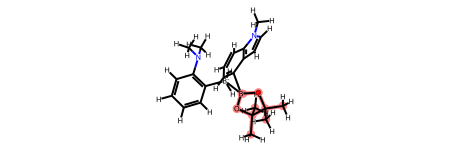

In [11]:
list(transformed_mol_dict.values())[0][0]

In [12]:
MolTo3DGrid(list(transformed_mol_dict.values())[0][0], kekulize=False, show_charges=True)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [17]:
MolTo3DGrid(all_mols, cell_size=(200,200), columns=5, show_charges=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [21]:
from frust.embedder import embed_ts
embeds = embed_ts(transformed_mol_dict, ts_type='INT3', n_confs=2)

Embedded 2 conformers on atom 48
Embedded 2 conformers on atom 49
Embedded 2 conformers on atom 50


In [23]:
MolTo3DGrid(list(embeds.values())[0][0], show_charges=True, kekulize=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.